In [9]:
import os
import cv2
import numpy as np
import random
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
DATASET_PATH = r"C:\CJ\SkillCraft Intership\Task 3 - Cats vs Dogs\train\train"
IMG_SIZE = 96
MAX_IMAGES = 6000   
print("Loading images...")
data = []
all_images = os.listdir(DATASET_PATH)
random.shuffle(all_images)
for img in tqdm(all_images[:MAX_IMAGES]):
    try:
        label = 0 if img.startswith("cat") else 1        
        img_path = os.path.join(DATASET_PATH, img)
        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))        
        data.append([image.flatten(), label])        
    except:
        pass
print("Total images processed:", len(data))
random.shuffle(data)
X = []
y = []
for features, label in data:
    X.append(features)
    y.append(label)
X = np.array(X) / 255.0   
y = np.array(y)
print("Feature shape:", X.shape)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Training SVM...")
from sklearn.svm import SVC
model = SVC(kernel='rbf', C=1, gamma='scale')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))
print("\nSample Predictions:")
for i in range(5):
    idx = random.randint(0, len(X_test)-1)
    pred = model.predict([X_test[idx]])[0]
    actual = y_test[idx]    
    pred_label = "Dog" if pred == 1 else "Cat"
    actual_label = "Dog" if actual == 1 else "Cat"    
    print(f"Predicted: {pred_label} | Actual: {actual_label}")

Loading images...


100%|██████████| 6000/6000 [01:39<00:00, 60.43it/s]


Total images processed: 6000
Feature shape: (6000, 9216)
Training SVM...

Accuracy: 0.6491666666666667

Classification Report:

              precision    recall  f1-score   support

           0       0.65      0.61      0.63       589
           1       0.65      0.68      0.67       611

    accuracy                           0.65      1200
   macro avg       0.65      0.65      0.65      1200
weighted avg       0.65      0.65      0.65      1200


Sample Predictions:
Predicted: Cat | Actual: Cat
Predicted: Dog | Actual: Cat
Predicted: Cat | Actual: Dog
Predicted: Cat | Actual: Dog
Predicted: Dog | Actual: Dog


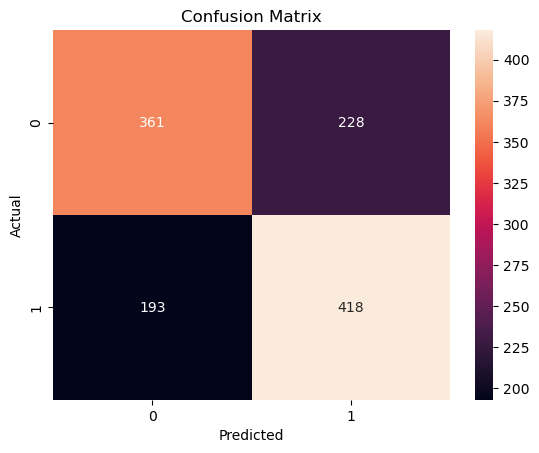

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()